* **드롭아웃**은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법이다. 드롭아웃은 훈련 중에 적용되며 평가나 예측에서는 적용하지 않는다. 텐서플로는 이를 자동으로 처리한다. 

* **콜백**은 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구이다. 대표적으로 최상의 모델을 자동으로 저장해 주거나 검증 점수가 더 이상 향상되지 않으면 일찍 종료할 수 있다. 

* **조기 종료**는 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법이다. 이렇게 하면 계산 비용과 시간을 절약할 수 있다. 

# TensorFlow

* **Dropout**은 드롭아웃 층이다. 
  * 첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정한다. 드롭아웃 하지 않는 뉴런의 출력은 1/(1-r)만큼 증가시켜 출력의 총합이 같도록 만든다. 
* **save_weights()**는 모든 층의 가중치와 절편을 파일에 저장한다. 
  * 첫 번째 매개변수에 저장할 파일을 지정한다. 
  * save_format 매개변수에서 저장할 파일의 포맷을 지정한다. 기본적으로 텐서플로의 Checkpoint 포맷을 사용한다. 이 매개션수를 'h5'로 지정하거나 파일의 확장자가 '.h5'이면 HDF5 포맷으로 저장된다. 
* **load_weights()** 는 모든 층의 가중치와 절편을 파일에 읽는다.
  * 첫 번째 매개션수에 읽을 파일을 지정한다. 
* **save()**는 모델 구조와 모든 가중치와 절편을 파일에 저장한다. 
  * 처 번째 매개벼순에 저장할 파일을 지정한다. 
  * save_format 매개변수에서 저장할 파일 포맷을 지정한다. 기본적으로 텐서플로의 SavedModel 포맷을 사용한다. 이 매개변수를 'h5'로 지정하거나 파일의 확장자가 '.h5'이면 HDF5 포맷으로 저장된다. 
* **load_model()**은 model.save()로 저장된 모델을 로드한다. 
  * 첫 번째 매개변수에 읽을 파일을 지정한다. 
* **ModelCheckpoint**는 케라스 모델과 가중치를 일정 간격으로 저장한다. 
  * 첫 번째 매개변수에 저장할 파일을 지정한다. 
  * monitor 매개변수는 모니터링할 지표를 지정한다. 기본값은 'val_loss'로 검증 손실을 관찰한다. 
  * save_weights_only 매개변수의 기본값은 False로 전체 모델을 저장한다. True로 지정하면 모델의 가중치와 절편만 저장한다. 
  * save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장한다. 
* **EarlyStopping**은 관심 지표가 더 이상 향상하지 않으면 훈련을 중지한다. 
  * monitor 매개변수는 모니터링할 지표를 지정한다. 기본값은 'val_loss'로 검증 손실을 관찰한다. 
  * patience 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정한다. 
  * restore_best_weights 매개변수에 최상의 모델 가중치를 복원할지 지정한다. 기본값은 False이다. 

# Numpy

* **argmax**는 배열에서 축을 따라 최댓값의 인덱스를 반환한다. 
  * axis 매개변수에서 어떤 축을 따라 최댓값을 찾을 지 지정한다. 기본값은 None으로 전체 배열에서 최댓값을 찾는다. 

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


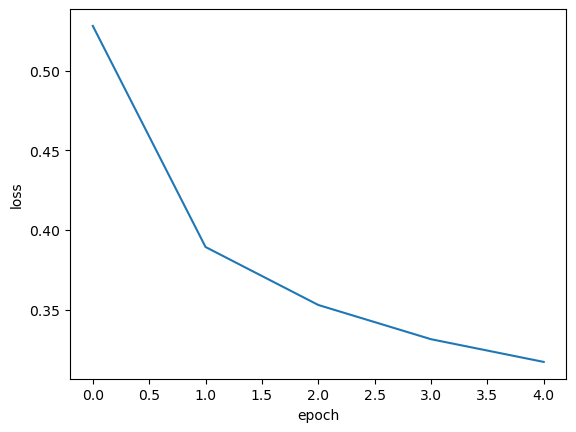

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

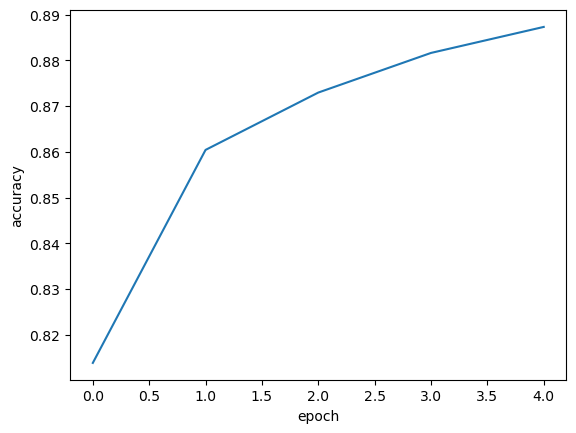

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

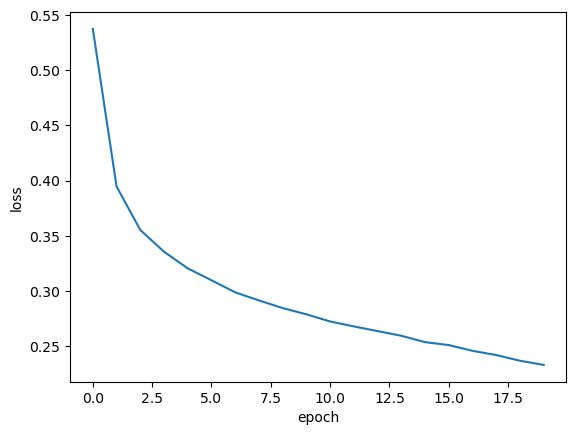

In [8]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


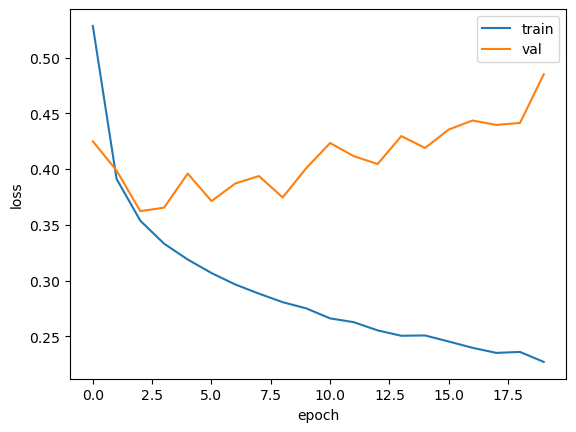

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

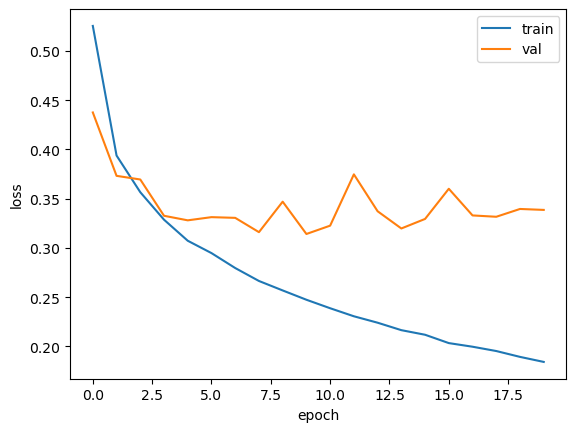

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


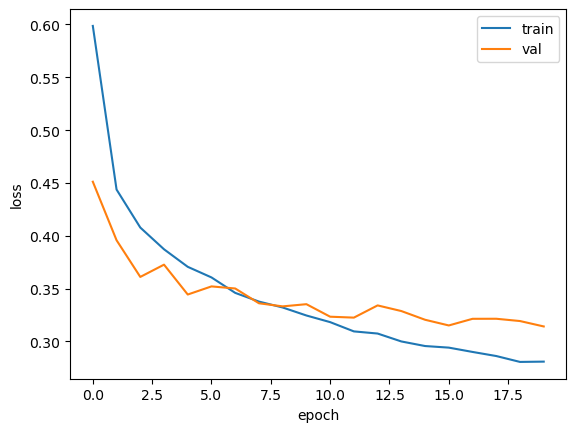

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [18]:
model.save_weights('model-weights.h5')

In [19]:
model.save('model-whole.h5')

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [21]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 1ms/step
0.88175


In [22]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8817


[0.3273531198501587, 0.8817499876022339]

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [24]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8822


[0.31798702478408813, 0.8821666836738586]

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [26]:
print(early_stopping_cb.stopped_epoch)

11


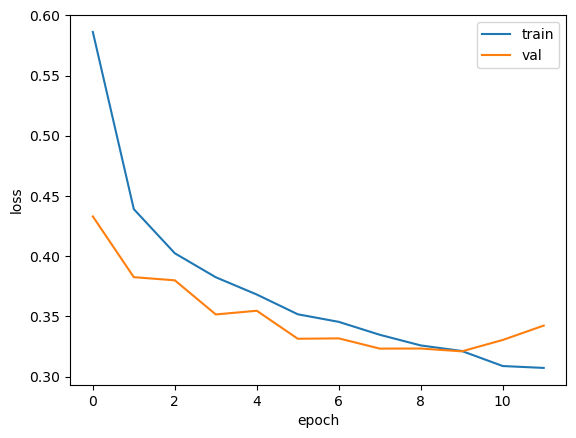

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8834


[0.3209911584854126, 0.8834166526794434]